In [ ]:
import tensorflow as tf
from tensorflow import keras

import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
batch_size = 10
img_width = 384
img_height = 216

In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/TEIA/Treino/com_cores/')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
#mudar para ('*/*.png') quando for trabalhar com Greyscale:
image_count = len(list(data_dir.glob('*/*.png')))
print("Quantidade de imagens:", image_count)

Quantidade de imagens: 1281


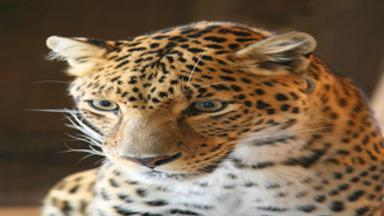

In [ ]:
onca = list(data_dir.glob('Onca/*/*.jpg'))
PIL.Image.open(str(onca[0]))

In [ ]:
dataset_treino = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #adicionar parâmetro 'color_mode' para trabalhar com imagens de canais diferentes de RGB:
  #color_mode = 'grayscale',
  batch_size=batch_size)

Found 6408 files belonging to 4 classes.
Using 5127 files for training.


In [ ]:
dataset_validacao = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #adicionar parâmetro 'color_mode' para trabalhar com imagens de canais diferentes de RGB:
  #color_mode = 'grayscale',
  batch_size=batch_size)

Found 6408 files belonging to 4 classes.
Using 1281 files for validation.


In [ ]:
class_names = dataset_treino.class_names
print(class_names)

['Cachorro', 'Cobra', 'Gato', 'Onca']


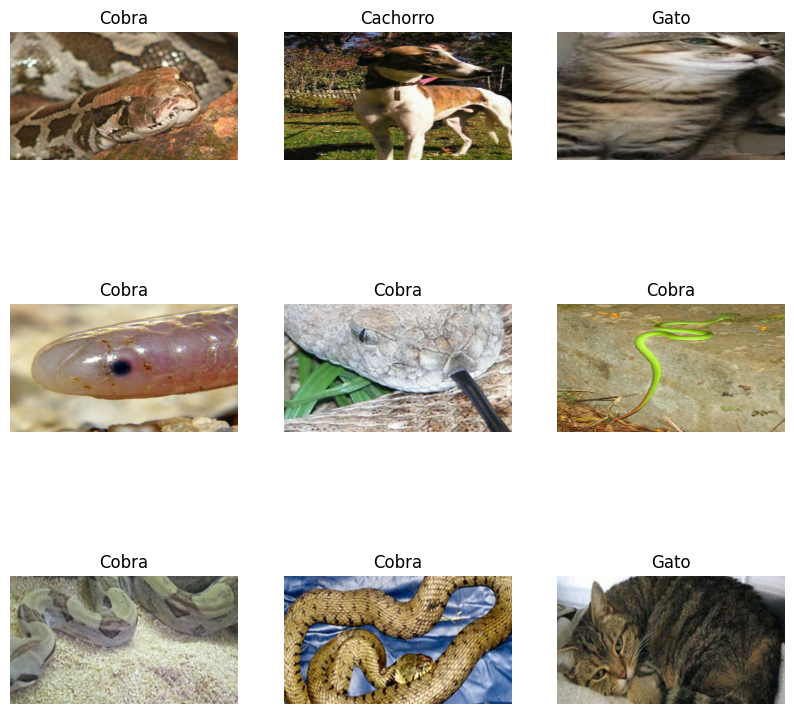

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_treino.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #adicionar parâmetro 'cmap' para trabalhar com imagens de canais diferentes de RGB:
    #plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

In [ ]:
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #Pa
  #keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 216, 384, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 216, 384, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 108, 192, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 192, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 96, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 54, 96, 64)       

In [ ]:
epochs = 10

history = model.fit(
  dataset_treino,
  validation_data=dataset_validacao,
  epochs=epochs
)


Epoch 1/10
513/513 [==============================] - 764s 1s/step - loss: 0.9733 - accuracy: 0.6437 - val_loss: 0.7449 - val_accuracy: 0.6932
Epoch 2/10
513/513 [==============================] - 297s 580ms/step - loss: 0.6590 - accuracy: 0.7382 - val_loss: 0.6414 - val_accuracy: 0.7494
Epoch 3/10
513/513 [==============================] - 299s 583ms/step - loss: 0.4446 - accuracy: 0.8319 - val_loss: 0.6667 - val_accuracy: 0.7510
Epoch 4/10
513/513 [==============================] - 298s 581ms/step - loss: 0.2482 - accuracy: 0.9093 - val_loss: 0.6127 - val_accuracy: 0.7627
Epoch 5/10
513/513 [==============================] - 297s 580ms/step - loss: 0.1429 - accuracy: 0.9497 - val_loss: 0.8985 - val_accuracy: 0.7650
Epoch 6/10
513/513 [==============================] - 298s 581ms/step - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.9358 - val_accuracy: 0.7783
Epoch 7/10
513/513 [==============================] - 307s 599ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 1.0070 - va

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

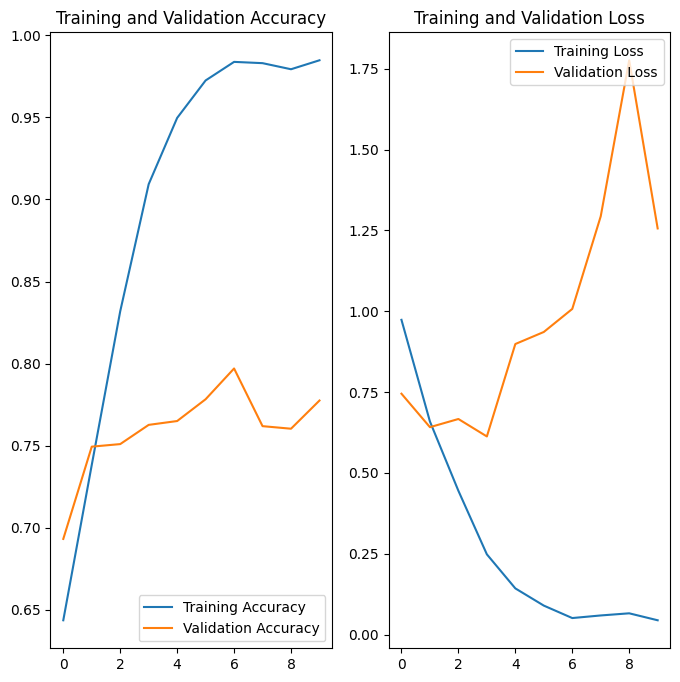

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
for i in range(10):
  print("Época ", i+1, ":", val_acc[i])

Época  1 : 0.6932084560394287
Época  2 : 0.7494145035743713
Época  3 : 0.7509757876396179
Época  4 : 0.7626854181289673
Época  5 : 0.7650273442268372
Época  6 : 0.7782981991767883
Época  7 : 0.7970335483551025
Época  8 : 0.761904776096344
Época  9 : 0.7603434920310974
Época  10 : 0.777517557144165
